In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from PIL import Image

# Load the data from the image file
img = Image.open('gwsspreadpixoff.bmp')
data = np.asarray(img)

(1920, 1920, 1)

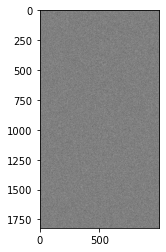

In [2]:
plt.imshow(data[100:1920,100:1100])
np.shape(data)
arr_sum = np.sum(data,axis=2, keepdims=True)
np.shape(arr_sum)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter
from skimage.feature import peak_local_max

# Load the image as a 2D array of grayscale values
# Load the data from the image file
rawimg = Image.open('tweezer15spacinggaussian.tif')
img = np.asarray(rawimg)
data = np.sum(img,axis=2, keepdims=True).reshape(1024,1280)

def gaussian2dcalculator(inputmatrix):
    # data= np.sum(inputmatrix,axis=2, keepdims=True).reshape(9,9)
    data = inputmatrix
    x = np.linspace(0,8,9)
    y = np.linspace(0,8,9)
    x, y = np.meshgrid(x,y)

    def twoD_Gaussian(xy, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
        x, y = xy
        xo = float(xo)
        yo = float(yo)    
        a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
        b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
        c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
        g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
        return g.ravel()

    initial_guess = (3,3,3,1,1,1,1)

    popt, pcov = curve_fit(twoD_Gaussian, (x,y), data.ravel(), p0=initial_guess)

    data_fitted = twoD_Gaussian((x, y), *popt)

    fig, ax = plt.subplots(1, 1)
    #ax.hold(True) For older versions. This has now been deprecated and later removed
    ax.imshow(data, cmap=plt.cm.jet, origin='lower',
    extent=(x.min(), x.max(), y.min(), y.max()))
    ax.contour(x, y, data, 8, colors='w')
    plt.show()

    # Extract parameter estimates and standard errors
    A, x0, y0, sigma_x, sigma_y, theta, offset = popt
    se_x0, se_y0 = np.sqrt(np.diag(pcov))[1:3]

    # Print results
    return (f"x0 = {x0:.3f} ± {se_x0:.3f}", f"y0 = {y0:.3f} ± {se_y0:.3f}")




FileNotFoundError: [Errno 2] No such file or directory: 'tweezer15spacinggaussian.tif'

ValueError: operands could not be broadcast together with shapes (81,) (99,) 

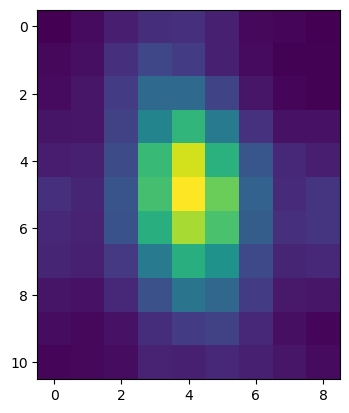

In [28]:
patch = data[193:204,576:585]
plt.imshow(patch)
print(gaussian2dcalculator(patch))

In [4]:
import numpy as np
from scipy.spatial.distance import euclidean


# Find 7x7 regions around local maxima
regions = []
threshold = 3.5  # half the width of the 7x7 square
while True:
    # Find next local maximum that hasn't already been included in a region
    mask = np.zeros_like(data, dtype=bool)
    mask[tuple(np.array(regions).T)] = True
    flat_data = data.flatten()
    flat_mask = mask.flatten()
    flat_data[flat_mask] = -100  # set already-masked values to -inf
    idx = np.argmax(flat_data)
    if np.isneginf(flat_data[idx]):
        break  # no more local maxima
    i, j = np.unravel_index(idx, data.shape)
    
    # Create mask for 7x7 square around local maximum
    x, y = np.meshgrid(np.arange(j-3, j+4), np.arange(i-3, i+4))
    dist = euclidean((i, j), np.dstack((x, y)))
    mask = dist <= threshold
    regions.append(np.stack(np.where(mask)).T)
    
# Print number of regions found
print(f"Found {len(regions)} 7x7 regions around local maxima")

ValueError: Input vector should be 1-D.

In [87]:
data = np.random.normal(size=(100, 100))
data[50, 50] = 10.0  # add a local maximum

In [89]:
np.shape(data)

(100, 100)

In [96]:
data = np.sum(img,axis=2, keepdims=True).reshape(1024,1280)

In [99]:
np.shape(data)

(1024, 1280)